# Marketing Analytics Exploratory/Statistical Analysis Task

## Introduction
This notebook will accomplish the following task:

### Overall goal:
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

### Section 01: Exploratory Data Analysis

- Are there any null values or outliers? How will you wrangle/handle them?
- Are there any useful variables that you can engineer with the given data?
- Do you notice any patterns or anomalies in the data? Can you plot them?

### Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

- What factors are significantly related to the number of store purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)

### Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

- Which marketing campaign is most successful?
- What does the average customer look like for this company?
- Which products are performing best?
- Which channels are underperforming?

## Dataset
Before beginning the analysis, we will load and view the dataset, and perform some initial cleaning.

- View the dataset info:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

In [349]:
df = pd.read_csv('ifood_df.csv')
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


- Column names are clear
- Data types are accurate

# Section 01: Exploratory Data Analysis

### Are there any null values or outliers? How will you wrangle/handle them?

#### Check NA values:
- No null values in any columns

In [24]:
df.isnull().sum().sort_values(ascending=False)

Income                  0
marital_Together        0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Widow           0
Complain                0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
Z_CostContact           0
AcceptedCmp2            0
Kidhome                 0
MntGoldProds            0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
AcceptedCmp1            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmpO

Anomalies and outliers:
- There are no problematic outliers detected
- `Z_costContact` and `Z_Revenue` columns seem to have a single unique value so they can be removed as they won't be of any use

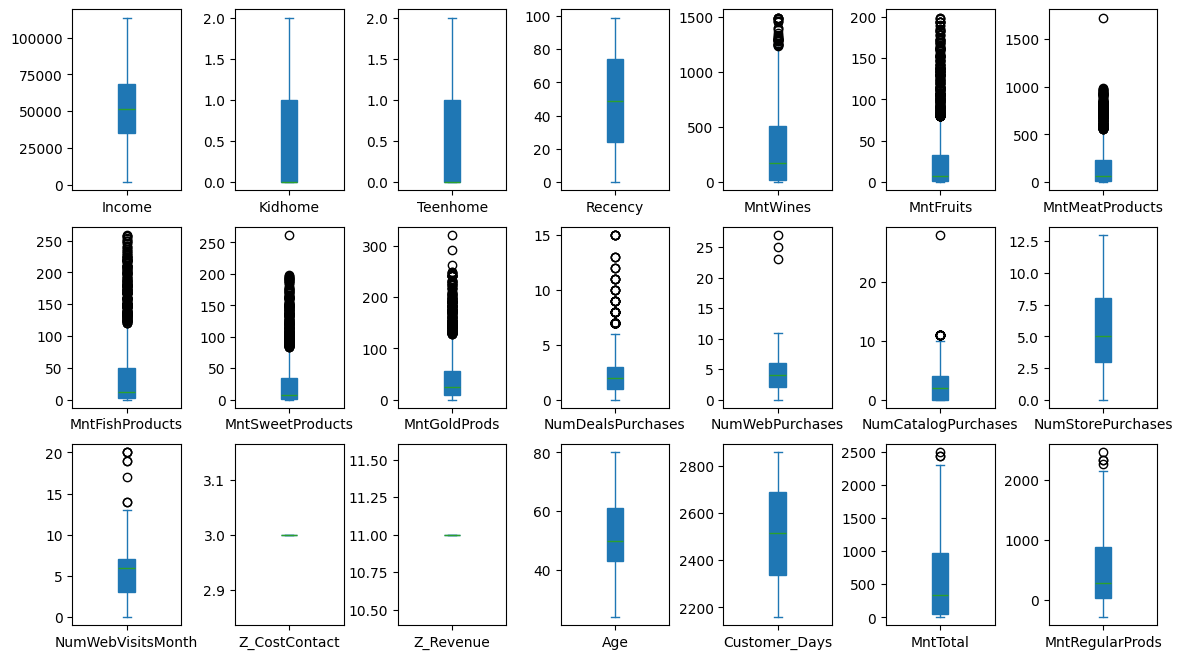

In [25]:
# Select columns to plot (excluding one-hot coded variables)
df_to_plot = df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpOverall', 
                              'Response', 'Complain', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together',
                              'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
                    ).select_dtypes(include=np.number)

# Subplots
df_to_plot.plot(subplots=True, layout=(3,7), kind='box', figsize=(14,8), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [26]:
df[['Z_CostContact', 'Z_Revenue']].nunique()

Z_CostContact    1
Z_Revenue        1
dtype: int64

In [27]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

### Are there any useful variables that you can engineer with the given data?

- The total number of dependents in the home ('Dependents') from the sum of 'Kidhome' and 'Teenhome'
- One-hot encoded columns can be engineered into a categorical format under a single column to become more human-readable and easier to aggregate for EDA:
    - The marital status ('MaritalStatus') from all features containing the keyword 'marital'
    - The education level ('EducationStatus') from all features containing the keyword 'education'
- The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [ ]:
# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Marital Status
marital_cols = [col for col in df.columns if 'marital' in col]
df['MaritalStatus'] = df[marital_cols].idxmax(axis=1)

# Education Status
education_cols = [col for col in df.columns if 'education' in col]
df['EducationStatus'] = df[education_cols].idxmax(axis=1)

df['MaritalStatus'] = df['MaritalStatus'].str.replace('marital_', '')
df['EducationStatus'] = df['EducationStatus'].str.replace('education_', '')

# Drop one-hot encoded
cols_to_drop = education_cols + marital_cols
df = df.drop(columns=cols_to_drop)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] 
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

In [31]:
df['MaritalStatus'] = pd.Categorical(df['MaritalStatus'])
df['EducationStatus'] = pd.Categorical(df['EducationStatus'])

print(df['MaritalStatus'].cat.categories)
print(df['EducationStatus'].cat.categories)

Index(['Divorced', 'Married', 'Single', 'Together', 'Widow'], dtype='object')
Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object')


In [38]:
# View new features
df[['Dependents', 'MaritalStatus', 'EducationStatus', 'TotalCampaignsAcc',]].head()

,Dependents,MaritalStatus,EducationStatus,TotalCampaignsAcc
0,0,Single,Graduation,1
1,2,Single,Graduation,0
2,0,Together,Graduation,0
3,1,Together,Graduation,0
4,1,Married,PhD,0


### Do you notice any patterns or anomalies in the data? Can you plot them?

To identify patterns, we will identify feature correlations. Positive correlations between features appear red, negative correlations appear blue, and no correlation appears grey in the clustered heatmap below. We can observe the following clusters of correlated features:

**Patterns:**

The "High Income" cluster:

- Spending amounts (Mnt features) and purchase frequencies (NumCatalogPurchases and other Num...Purchases features) are positively correlated with Income.
- Amount of dependents (kids & teens), number of deal purchases and web visits are negatively correlated with income.

The "Have Kids & Teens" cluster:
- Spending (Mnt features) and purchase counts (Num...Purchases features) are negatively correlated with Dependents, with the effect more pronounced for kids than teens.
- The number of deal-based purchases (NumDealsPurchases) is positively correlated with Dependents (kids and/or teens).

The "Advertising Campaigns" cluster:
- Acceptance of the advertising campaigns ('AcceptedCmp' and 'Response') are strongly positively correlated with each other
- These campaign features are weakly positively correlated with the "High Income" cluster and weakly negatively correlated with the "Have Kids & Teens" cluster.

In-store and Web purchases:
- The amount of fruit, meat, and fish products ('MntFishProducts', 'MntFruits', 'MntMeatProducts') purchased shows a slightly stronger positive correlation with in-store purchases than with web purchases, suggesting that customers may prefer to physically examine these items before buying.
- While, 'MntWines', 'MntSweetProducts', and 'MntGoldProds' show no notable difference in correlation between in-store and web, suggesting less need for physical examination for these products.

**Anomalies:**

- Unexpectedly, the number of website visits in the last month ('NumWebVisitsMonth') is not correlated with the number of online purchases ('NumWebPurchases').
- Instead, 'NumWebVisitsMonth' shows a positive correlation with 'NumDealsPurchases', suggesting that promotional deals may effectively drive web traffic into purchases, or vice versa.

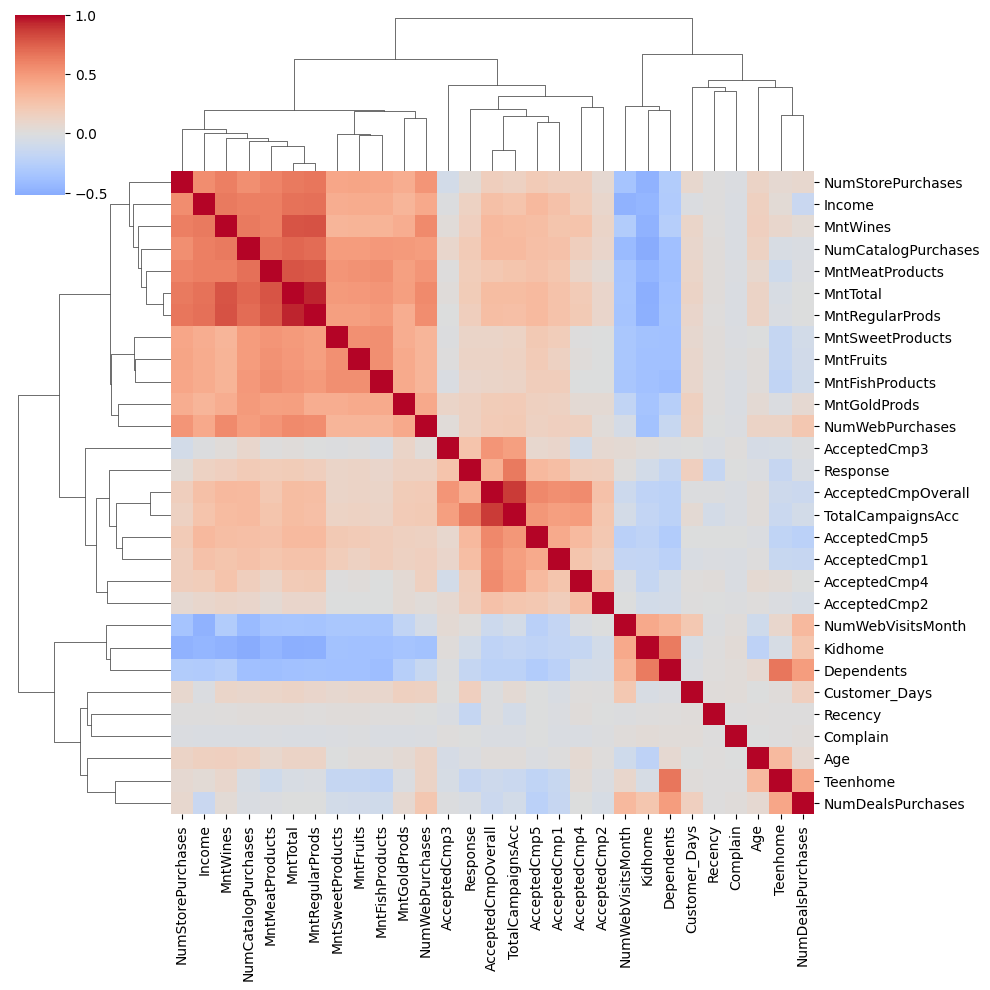

In [34]:
# Calculate correlation matrix
num_df = df.select_dtypes(include=np.number)

## using non-parametric test of correlation (kendall), since some features are binary
corrs = num_df.corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cmap='coolwarm', center=0);

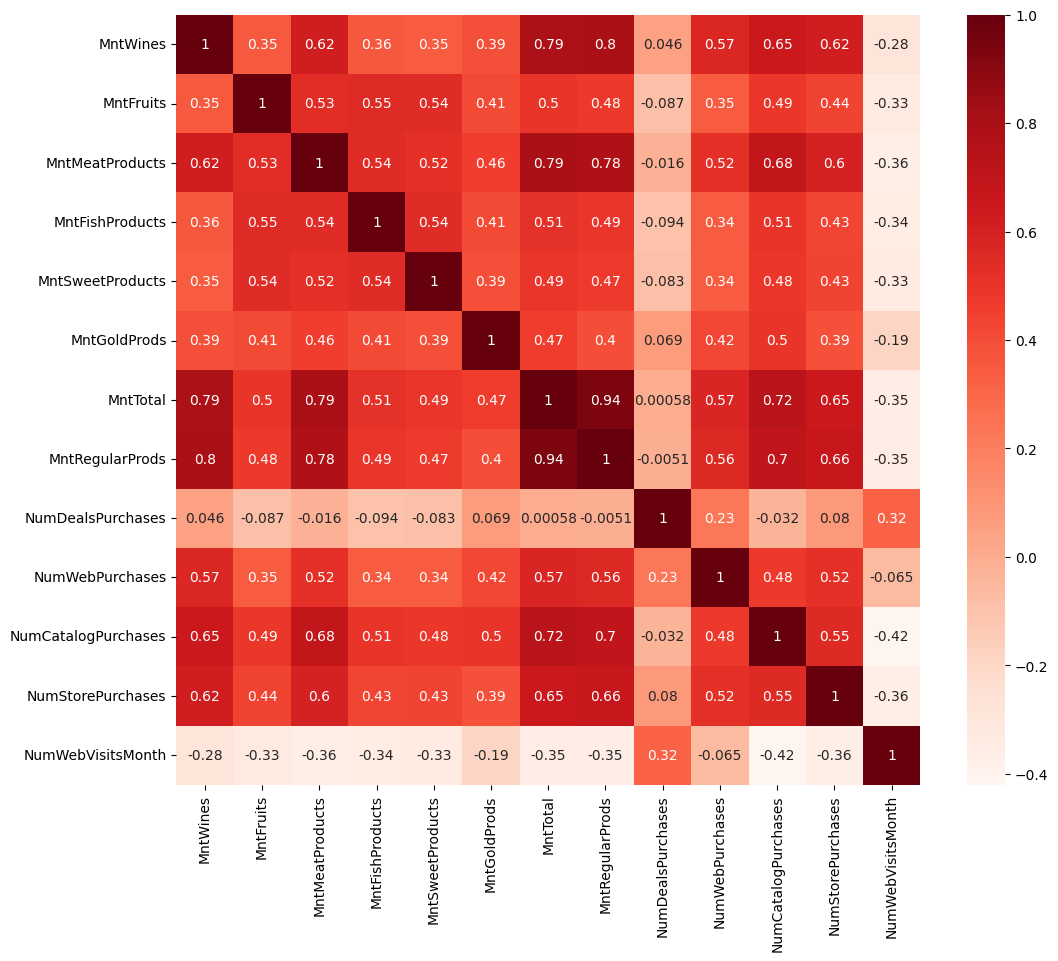

In [141]:
plt.figure(figsize=(12,10))
sns.heatmap(corrs, annot=True, cmap=plt.cm.Reds)
plt.show()

- Plot illustrating the effect of high income on spending:

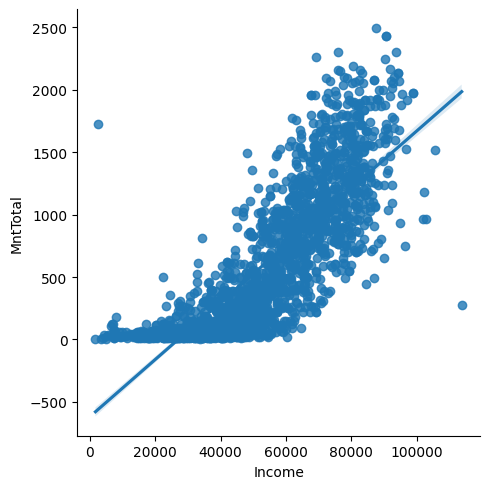

In [36]:
sns.lmplot(x='Income', y='MntTotal', data=df)

- Plot illustrating negative effect of having dependents (kids & teens) on spending:
    - Less prominent for having teens
    - More significant for the amount for kids at home

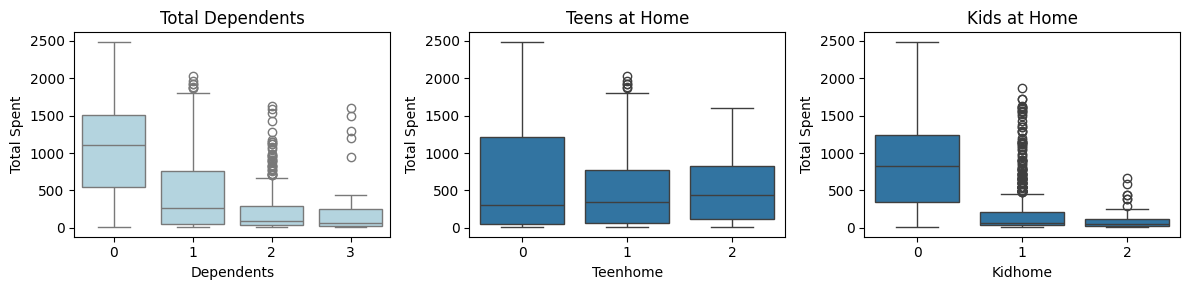

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes = axes.flatten() 

sns.boxplot(x='Dependents', y='MntTotal', data=df, ax=axes[0], color = 'lightblue').set(title='Total Dependents', ylabel = 'Total Spent')
sns.boxplot(x='Teenhome', y='MntTotal', data=df, ax=axes[1]).set(title='Teens at Home', ylabel = 'Total Spent')
sns.boxplot(x='Kidhome', y='MntTotal', data=df, ax=axes[2]).set(title='Kids at Home', ylabel = 'Total Spent')

plt.tight_layout()
plt.show()

- Plot illustrating positive effect of having dependents (kids & teens) and slightly negative effect of income on number of deals purchases:

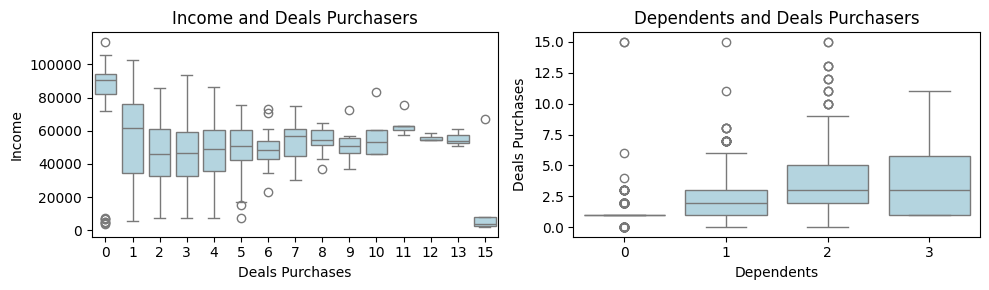

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes = axes.flatten() 

sns.boxplot(x='NumDealsPurchases', y='Income', data=df, ax=axes[0], color='lightblue'
           ).set(title='Income and Deals Purchasers', xlabel = 'Deals Purchases', ylabel = 'Income')
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df, ax=axes[1], color='lightblue'
           ).set(title='Dependents and Deals Purchasers', ylabel = 'Deals Purchases')

plt.tight_layout()
plt.show()

- Plots illustrating the positive effect of income and negative effect of having dependents (kids & teens) on advertising campaign acceptance:

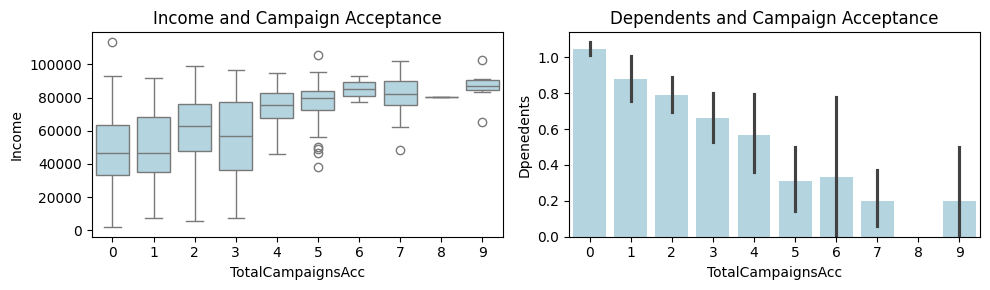

In [347]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes = axes.flatten() 

sns.boxplot(x='TotalCampaignsAcc', y='Income', data=df, ax=axes[0], color='lightblue'
           ).set(title='Income and Campaign Acceptance', ylabel = 'Income')
sns.barplot(x='TotalCampaignsAcc', y='Dependents', data=df, ax=axes[1], color='lightblue'
           ).set(title='Dependents and Campaign Acceptance', ylabel = 'Dpenedents')

plt.tight_layout()
plt.show()

* Investigate anomaly: 
    - Number of web visits in the last month is not positively correlated with number of web purchases
    - Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website

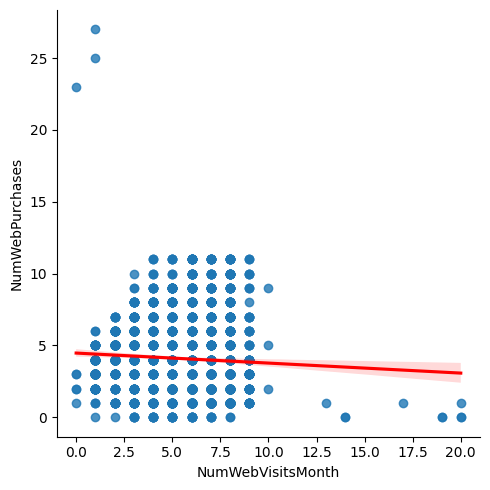

In [56]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df, line_kws={'color': 'red'})

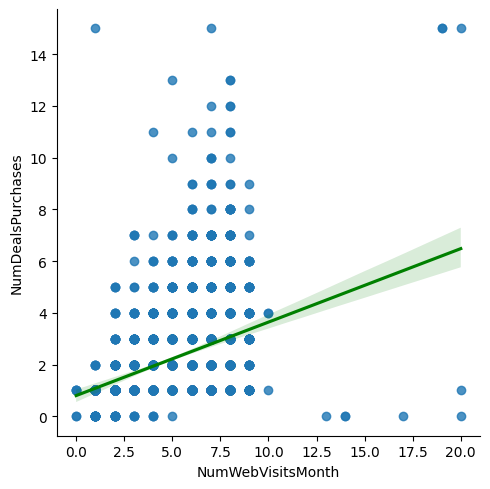

In [60]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df, line_kws={'color': 'green'})

# Section 02: Statistical Analysis

Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.  

### What factors are significantly related to the number of store purchases?  

* We will use use a linear regression model with `NumStorePurchases` as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases
* Begin by plotting the target variable:

Text(0, 0.5, 'count')

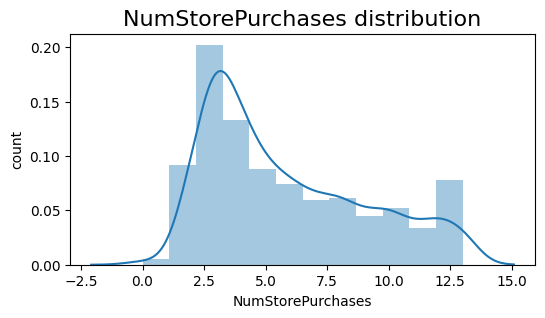

In [67]:
plt.figure(figsize=(6,3))
sns.distplot(df['NumStorePurchases'], kde=True, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count')

In [72]:
# get categorical features and review number of unique values
cat = df.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())

Number of unique values per categorical feature:
 MaritalStatus      5
EducationStatus    5
dtype: int64


- In order to use machine learning techniques, we need the categorical features in one-hot encoded format. So we will use the original data, prior to our transformations for the EDA part.

In [346]:
rdf = pd.read_csv('/Users/canokten/Desktop/ifood_df.csv')
# print(rdf.info())
rdf.head(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0


* Fit linear regression model to training data (70% of dataset)
* Evaluate predictions on test data (30% of dataset) using RMSE and R squared:
    - Findings:
        - The RMSE is less than half of the median value of the target variable, indicating good model predictions
        - The R squared score shows that the model captures more than half of the relevant information (58%), indicating moderate level of predictive power

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Isolate X and y variables, and perform train-test split
X = rdf.drop(columns='NumStorePurchases')
y = rdf['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test) # Get predictions
accuracy = model.score(X_test, y_test) # Compares predictions to true y_test, get explained variance (R squared)


# Evaluate model using RMSE and R squared
print("Model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())
print("Model explained variance (R squared): ", accuracy)

Model RMSE:  2.062885090824379
Median value of target variable:  5.0
Model explained variance (R squared):  0.5821521732187662


* Identify features that significantly affect the number of store purchases, using permutation importance:
    - Significant features:
        - Most significant: 'MntTotal', 'Income'
        - Less but considerable: 'NumWebVisitsMonth', 'NumDealsPurchases', 'MntMeatProducts'
        - All other features are less significant

In [86]:
%pip install eli5
import eli5


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [109]:
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=10)

Weight,Feature
0.1908 ± 0.0218,MntTotal
0.1670 ± 0.0180,Income
0.0779 ± 0.0212,NumWebVisitsMonth
0.0645 ± 0.0109,NumDealsPurchases
0.0540 ± 0.0202,MntMeatProducts
0.0353 ± 0.0138,Kidhome
0.0307 ± 0.0171,NumWebPurchases
0.0279 ± 0.0045,MntRegularProds
0.0238 ± 0.0146,Response
0.0099 ± 0.0107,NumCatalogPurchases


* Explore the directionality of these effects, using SHAP values:
    - Findings:
        - The number of store purchases increases with higher number of total purchases, income, number of web visits in a month, and number or deal purchases ('MntTotal', 'Income', 'NumWebVisitsMonth', 'NumDealsPurchases')
        - The number of store purchases decreases with the number meat purchases ('MntMeatProducts')
    - Interpretation:
        - Customers who shop the most in stores are those with high income, spenditure, web visits and deal purchases. 

In [110]:
%pip install shap
import shap


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


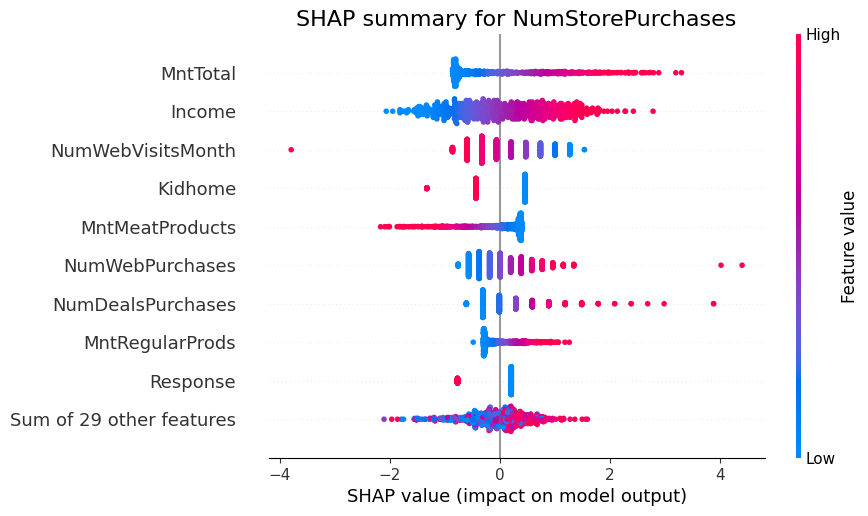

In [119]:
# Calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# Plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=10);

### Do people who spent an above average amount on gold in the last 2 years have more in-store purchases?

**Null hypothesis (H₀):**
There is no difference in the average number of store purchases between customers who spent above-average and those who spent average or below-average on gold products.

**Alternative hypothesis (H₁):**
Customers who spent above-average on gold products have more store purchases.

- Distribution:
    - Number of store purchases isn't a continous variable so the standard t-test can't be used to test statistical significance. We will use the Mann-Whitney U test which can handle count data.

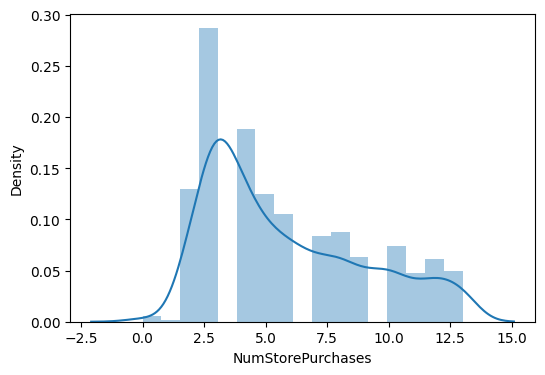

In [344]:
plt.figure(figsize=(6,4))
sns.distplot(df['NumStorePurchases'])
plt.show() 

- Results:
    - Since the p-value is significantly lower than 0.05, we reject the null hypothesis and conclude that customers who spent above-average on gold products have more store purchases.

In [132]:
from scipy.stats import mannwhitneyu

avg_gold = df['MntGoldProds'].mean()

# Above average spenders
above_avg_spenders = df[df['MntGoldProds'] > avg_gold]
# Average or below spenders
avg_or_below_spenders = df[df['MntGoldProds'] <= avg_gold]

group_high = above_avg_spenders['NumStorePurchases']
group_low = avg_or_below_spenders['NumStorePurchases']

# One-sided Mann-Whitney U test: test if above-average spenders have more store purchases
u_stat, p_value = mannwhitneyu(group_high, group_low, alternative='greater')
print(f"Mann-Whitney U test p-value: {p_value}")

print("Above average gold spenders mean:", group_high.mean())
print("Average or below gold spenders mean:", group_low.mean())

Mann-Whitney U test p-value: 5.7916012198280485e-92
Above average gold spenders mean: 7.78134110787172
Average or below gold spenders mean: 4.939433838051349


### Do "Married PhD candidates" have a significant relation with amount spent on fish?
**Null hypothesis (H₀):**
Married PhD candidates spend the same or less on fish products than all other customers.

**Alternative hypothesis (H₁):**
Married PhD candidates spend more on fish products than all other customers.

- Distribution:
    - The amount spent on fish products is highly skewed and zero-inflated, thus we will again use the Mann-Whitney U test which can handle such distribution.

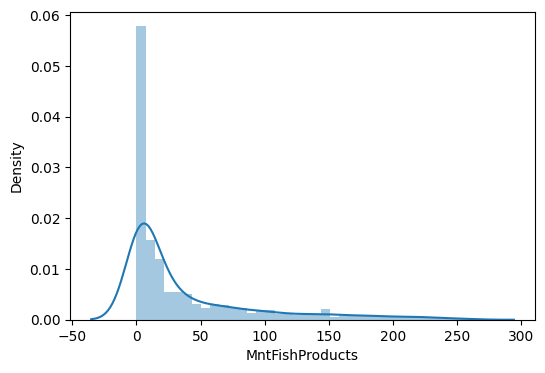

In [343]:
plt.figure(figsize=(6,4))
sns.distplot(df['MntFishProducts'])
plt.show() 

- Results:
    - The p-value is extremely high so don't reject the null hypothesis. We conclude that married PhD candidates spend the same or less on fish products than all other customers.

In [133]:
# Create boolean mask for Married PhD candidates
married_phd = (df['MaritalStatus'] == 'Married') & (df['EducationStatus'] == 'PhD')

# Split groups
married_phd_group = df[married_phd]['MntFishProducts']
other_group = df[~married_phd]['MntFishProducts']

# Mann-Whitney U test (one-sided, 'greater')
u_stat, p_value = mannwhitneyu(married_phd_group, other_group, alternative='greater')
print(f"Mann-Whitney U test p-value: {p_value}")
print("Married PhD mean fish spending:", married_phd_group.mean())
print("Others mean fish spending:", other_group.mean())

Mann-Whitney U test p-value: 0.9999865748662653
Married PhD mean fish spending: 27.32085561497326
Others mean fish spending: 38.72348860257681


Since the p-value is extremely high, it raises the question whether or not married PhD candidates spend less than others, and is it statistically significant?

- Result:
    - We find that married PhD candidates spend less on fish products than all other customer

In [136]:
# Mann-Whitney U test (one-sided, 'greater')
u_stat, p_value = mannwhitneyu(other_group, married_phd_group, alternative='greater')
print(f"Mann-Whitney U test p-value: {p_value}")

Mann-Whitney U test p-value: 1.3432273356250038e-05


### What other factors are significantly related to amount spent on fish? (Use interaction effects.)

- Fit linear regression model to training data (70% of dataset)
- Evaluate predictions on test data (30% of dataset) using RMSE and R squared:
    - Findings:
        - The RMSE is less than half of the median value of the target variable, indicating good model predictions
        - The R squared score shows that the model captures almost all relevant information (close to 100%), indicating great level of predictive power

In [142]:
# Isolate X and y variables, and perform train-test split
X = rdf.drop(columns='MntFishProducts')
y = rdf['MntFishProducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test) # Get predictions
accuracy = model.score(X_test, y_test) # Compares predictions to true y_test, get explained variance (R squared)


# Evaluate model using RMSE and R squared
print("Model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())
print("Model explained variance (R squared): ", accuracy)

Model RMSE:  3.2532244042250058e-12
Median value of target variable:  12.0
Model explained variance (R squared):  1.0


* Identify features that significantly affect the amount of fish purchases, using permutation importance:
    - Significant features:
        - Most significant: 'MntTotal', 'MntWines', 'MntMeatProducts', 'MntRegularProds'
        - Less but considerable: 'MntSweetProducts', 'MntFruits', 'MntGoldProds'
        - All other features aren't significant

In [143]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=10)

Weight,Feature
113.2971 ± 4.6749,MntTotal
90.2568 ± 5.3507,MntWines
31.7062 ± 2.0527,MntMeatProducts
26.0475 ± 1.0401,MntRegularProds
1.3902 ± 0.0688,MntSweetProducts
1.1481 ± 0.0650,MntFruits
0.2426 ± 0.0175,MntGoldProds
0 ± 0.0000,NumStorePurchases
0 ± 0.0000,NumCatalogPurchases
0 ± 0.0000,AcceptedCmp3


* Explore the directionality of these effects, using SHAP values:
    - Findings:
        - The number of fish purchases increases with higher number of total purchases and amount spent on regular products ('MntTotal', 'MntRegularProds')
        - The number of fish purchases decreases with the number of wine, meat, sweet, and fruit products purchases ('MntWines', 'MntMeatProducts', 'MntSweetProducts', 'MntFruits')
    - Interpretation:
        - Customers who buy the most fish products are those with high expenditure overall, but less spenditure on wines, other meat products, sweets and fruits. 

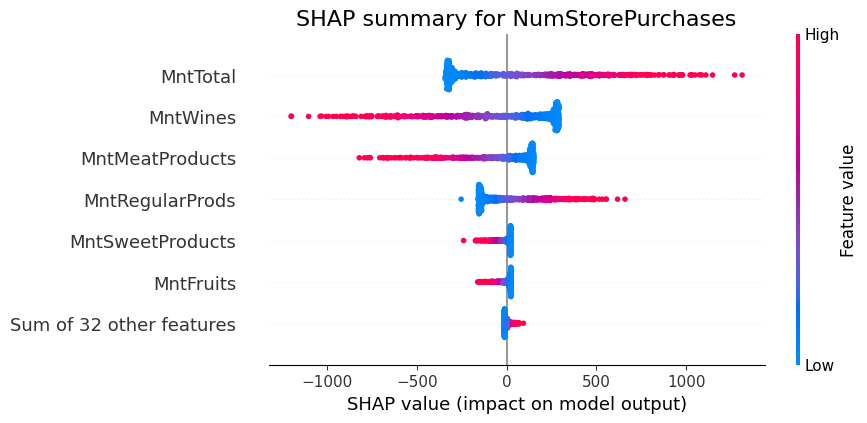

In [149]:
# Calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# Plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=7);

# Section 03: Data Visualization

Please plot and visualize the answers to the below questions.

### Which marketing campaign is most successful?

* Plot marketing campaign overall acceptance rates:
    - Findings: The most successful campaign is the most recent (column name: `Response`)

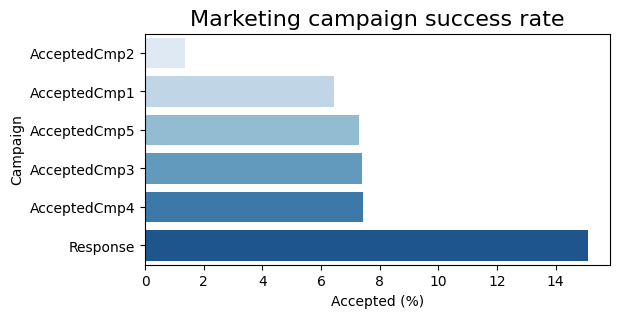

In [156]:
# Calculate success rate (percent accepted)
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()


# Plot
plt.figure(figsize=(6,3))
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

### What does the average customer look like for this company?

* The average customer is...
    - 51 years old
    - Has been a customer for almost 7 years
    - Has an income of roughly $52,000 per year
    - Has 1 dependent
    - Made a purchase from our company in the last 49 days

In [204]:
# Binary response cols
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']
# Spending cols
mnt_cols = [col for col in df.columns if 'Mnt' in col]
# Channel cols
channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalCampaignsAcc']

# Prep demographic data
demo_df = df.drop(columns=binary_cols+mnt_cols+channel_cols+['Kidhome', 'Teenhome', 'MaritalStatus', 'EducationStatus', 'Married_PhD'])

In [213]:
demographics = pd.DataFrame(demo_df.mean(), columns=['Average']).reset_index()

# Turn Customer_Days to years
demographics.loc[demographics['index'] == 'Customer_Days', 'Average'] /= 365
demographics.loc[demographics['index'] == 'Customer_Days', 'index'] = 'Customer_Years'

demographics['Average'] = round(demographics['Average'],1)

demographics

,index,Average
0,Income,51622.1
1,Recency,49.0
2,Age,51.1
3,Customer_Years,6.9
4,Dependents,0.9


### Which products are performing best?

* The average customer spent...
    - \$25-50 on Fruits, Sweets, Fish, and Gold products
    - Over \$160 on Meat products
    - Over \$300 on Wines
    - Over \$600 total
* Products performing best:
    - Wines followed by meat products

Text(0.5, 1.0, 'Average Product Spending')

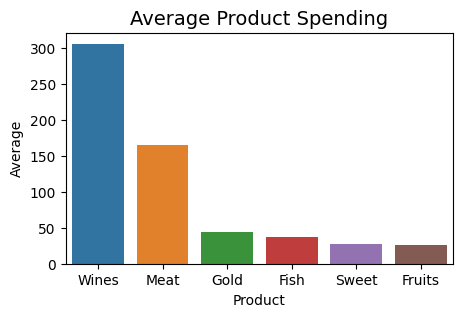

In [321]:
# Calculate averages
products = df[mnt_cols].mean().reset_index()
products.columns = ['Product', 'Average']

# Drop total spent on regular products and total spent overall)
products = products[~products['Product'].isin(['MntTotal', 'MntRegularProds'])]

# Tidy names and sort by average spent per product
products['Product'] = products['Product'].str.replace('Mnt', '').str.replace('Products', '').str.replace('Prods', '')
products = products.sort_values(by = 'Average', ascending = False)

plt.figure(figsize=(5,3))
sns.barplot(x='Product', y='Average', data = products, hue = 'Product').set_title('Average Product Spending', size = 14)

### Which channels are underperforming?

* Channels: The average customer...
    - Accepted less than 1 advertising campaign
    - Made 2 deals purchases, over 2 catalog purchases, 4 web purchases, and 5 store purchases
    - Averaged 14 total purchases
    - Visited the website 5 times
* Underperforming channels:
    - Advertising campaigns followed by deals, and catalog channels

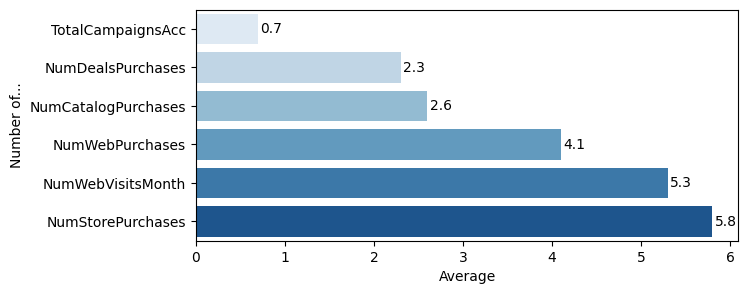

In [341]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# Plot
plt.figure(figsize=(7,3))
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## Text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.15,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

# Conclusion

**Recall the overall goal:**  
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions...

**Summary of actionable findings to improve advertising campaign success:**  
* The most successful advertising campaign was the most recent campaign (column name: `Response`).
    - Suggested action: Conduct future advertising campaigns using the same model recently implemented. 
* Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids/teens
    - Suggested action: Create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens and another aimed at lower-income individuals with kids/teens
* The most successful products are wines and meats (*i.e.* the average customer spent the most on these items)
    - Suggested action: Focus advertising campaigns on boosting sales of the less popular items
* The underperforming channels are deals and catalog purchases (*i.e.* the average customer made the fewest purchases via these channels)
* The best performing channels are web and store purchases (*i.e.* the average customer made the most purchases via these channels)
    - Suggested action: Focus advertising campaigns on the more successful channels, to reach more customers